# Atividade Prática 1
Descrição: Configurando o Terraform no Google Cloud.

Objetivo: Através do Google Colab criar um bucket de armazenamento no GCP usando Terraform.

* Configure suas credenciais no GCP
* Instalar o terraforms.

In [1]:
!curl -fsSL https://apt.releases.hashicorp.com/gpg | sudo apt-key add -
!sudo apt-add-repository "deb [arch=amd64] https://apt.releases.hashicorp.com $(lsb_release -cs) main"
!sudo apt-get update
!sudo apt-get install terraform
!terraform -v # Para verificar a instalação

OK
Repository: 'deb [arch=amd64] https://apt.releases.hashicorp.com jammy main'
Description:
Archive for codename: jammy components: main
More info: https://apt.releases.hashicorp.com
Adding repository.
Press [ENTER] to continue or Ctrl-c to cancel.
Found existing deb entry in /etc/apt/sources.list.d/archive_uri-https_apt_releases_hashicorp_com-jammy.list
Adding deb entry to /etc/apt/sources.list.d/archive_uri-https_apt_releases_hashicorp_com-jammy.list
Found existing deb-src entry in /etc/apt/sources.list.d/archive_uri-https_apt_releases_hashicorp_com-jammy.list
Adding disabled deb-src entry to /etc/apt/sources.list.d/archive_uri-https_apt_releases_hashicorp_com-jammy.list
Hit:1 https://apt.releases.hashicorp.com jammy InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-upd

* Criar o arquivo main.tf

In [2]:
%%writefile main.tf
terraform {
  required_providers {
    google = {
      source  = "hashicorp/google"
      version = "~> 4.0" # ou a versão mais recente
    }
  }
}

provider "google" {
  project     = "decoded-app-453116-m4" # ID do seu projeto GCP
  region      = "us-central1" # Região padrão, você pode alterar
  credentials = file("/content/decoded-app-453116-m4-83736621c012.json") # Usa a variável de ambiente configurada
}

resource "google_storage_bucket" "petadota_bucket" {
  name          = "petadota-bucket-storage-dugulin" # nome de bucket único globalmente
  location      = "US" # Localização do bucket
  storage_class = "STANDARD" # Classe de armazenamento
}

Overwriting main.tf


* Executar o Terraform no colab

In [3]:
!terraform init # Inicializa o Terraform

Initializing the backend...
Initializing provider plugins...
- Reusing previous version of hashicorp/google from the dependency lock file
- Using previously-installed hashicorp/google v4.85.0

Terraform has been successfully initialized!

You may now begin working with Terraform. Try running "terraform plan" to see
any changes that are required for your infrastructure. All Terraform commands
should now work.

If you ever set or change modules or backend configuration for Terraform,
rerun this command to reinitialize your working directory. If you forget, other
commands will detect it and remind you to do so if necessary.


In [4]:
!terraform plan # Verifica o que será criado (plano de execução)


Terraform used the selected providers to generate the following execution plan. Resource actions are indicated with the following symbols:
  + create

Terraform will perform the following actions:

  # google_compute_instance.vm_petadota will be created
  + resource "google_compute_instance" "vm_petadota" {
      + can_ip_forward       = false
      + cpu_platform         = (known after apply)
      + current_status       = (known after apply)
      + deletion_protection  = false
      + guest_accelerator    = (known after apply)
      + id                   = (known after apply)
      + instance_id          = (known after apply)
      + label_fingerprint    = (known after apply)
      + machine_type         = "e2-medium"
      + metadata_fingerprint = (known after apply)
      + min_cpu_platform     = (known after apply)
      + name                 = "vm-petadota-webserver"
      + project              = (known after apply)
      + self_link            = (known after apply)
      + 

* O bucket será criado na conta do GCP.

In [5]:
!terraform apply -auto-approve # Aplica as mudanças e cria o bucket


Terraform used the selected providers to generate the following execution plan. Resource actions are indicated with the following symbols:
  + create

Terraform will perform the following actions:

  # google_compute_instance.vm_petadota will be created
  + resource "google_compute_instance" "vm_petadota" {
      + can_ip_forward       = false
      + cpu_platform         = (known after apply)
      + current_status       = (known after apply)
      + deletion_protection  = false
      + guest_accelerator    = (known after apply)
      + id                   = (known after apply)
      + instance_id          = (known after apply)
      + label_fingerprint    = (known after apply)
      + machine_type         = "e2-medium"
      + metadata_fingerprint = (known after apply)
      + min_cpu_platform     = (known after apply)
      + name                 = "vm-petadota-webserver"
      + project              = (known after apply)
      + self_link            = (known after apply)
      + 

# Atividade Prática 2
## Descrição:Criando uma Máquina Virtual no AWS EC2 com Terraform
##Objetivo: Através do Google Colab provisionar uma máquina virtual no Google Cloud (GCP) usando Terraform para hospedar a infraestrutura da PetAdota.

##* Criar o arquivo main.tf


In [6]:
%%writefile main.tf
terraform {
  required_providers {
    google = {
      source  = "hashicorp/google"
      version = "~> 4.0" # ou a versão mais recente
    }
  }
}

provider "google" {
  project     = "decoded-app-453116-m4" # ID do seu projeto GCP
  region      = "us-central1" # Região padrão
  zone        = "us-central1-a" # Zona padrão
  credentials = file("/content/decoded-app-453116-m4-83736621c012.json")
}

Overwriting main.tf


* Criar o arquivo vm.tf

In [7]:
%%writefile vm.tf
resource "google_compute_instance" "vm_petadota" {
  name         = "vm-petadota-webserver"
  machine_type = "e2-medium" # Tipo de máquina (pode ser ajustado)
  zone         = "us-central1-a"

  boot_disk {
    initialize_params {
      image = "debian-cloud/debian-11" # Imagem do sistema operacional (Debian 11)
    }
  }

  network_interface {
    network = "default" # Rede padrão
    access_config {}     # Endereço IP público (efêmero, por padrão)
  }

#    metadata = {
#    ssh-keys = "meuusuario:${file("~/.ssh/id_rsa.pub")}" # ou o caminho completo para a chave
#  }
}


output "vm_public_ip" {
  value = google_compute_instance.vm_petadota.network_interface.0.access_config.0.nat_ip
}

Overwriting vm.tf


* Executar o arquivo terraform

In [8]:
!terraform plan # Plano de execução para vm.tf (opcional, mas recomendado)

google_storage_bucket.petadota_bucket: Refreshing state... [id=petadota-bucket-storage-dugulin]

Terraform used the selected providers to generate the following execution plan. Resource actions are indicated with the following symbols:
  + create
  - destroy

Terraform will perform the following actions:

  # google_compute_instance.vm_petadota will be created
  + resource "google_compute_instance" "vm_petadota" {
      + can_ip_forward       = false
      + cpu_platform         = (known after apply)
      + current_status       = (known after apply)
      + deletion_protection  = false
      + guest_accelerator    = (known after apply)
      + id                   = (known after apply)
      + instance_id          = (known after apply)
      + label_fingerprint    = (known after apply)
      + machine_type         = "e2-medium"
      + metadata_fingerprint = (known after apply)
      + min_cpu_platform     = (known after apply)
      + name                 = "vm-petadota-webserver"
  

* Uma VM deve ser criada em sua conta GCP

In [9]:
!terraform apply -auto-approve # Aplica as mudanças de vm.tf

google_storage_bucket.petadota_bucket: Refreshing state... [id=petadota-bucket-storage-dugulin]

Terraform used the selected providers to generate the following execution plan. Resource actions are indicated with the following symbols:
  + create
  - destroy

Terraform will perform the following actions:

  # google_compute_instance.vm_petadota will be created
  + resource "google_compute_instance" "vm_petadota" {
      + can_ip_forward       = false
      + cpu_platform         = (known after apply)
      + current_status       = (known after apply)
      + deletion_protection  = false
      + guest_accelerator    = (known after apply)
      + id                   = (known after apply)
      + instance_id          = (known after apply)
      + label_fingerprint    = (known after apply)
      + machine_type         = "e2-medium"
      + metadata_fingerprint = (known after apply)
      + min_cpu_platform     = (known after apply)
      + name                 = "vm-petadota-webserver"
  

# Atividade Prática 3
Descrição: Configurando um Servidor Web com Ansible.

Objetivo: Utilizar Ansible para instalar e configurar o Apache automaticamente em um servidor.

* Criar o arquivo playbook.yml

In [10]:
%%writefile playbook.yml
---
- hosts: all # Aplica a todos os hosts definidos no inventário
  become: true # Necessário para executar comandos com privilégios de administrador (sudo)
  tasks:
    - name: Atualizar cache do apt
      apt:
        update_cache: yes

    - name: Instalar o Apache
      apt:
        name: apache2
        state: present # Garante que o Apache esteja instalado

    - name: Iniciar o serviço Apache
      service:
        name: apache2
        state: started
        enabled: yes # Garante que o Apache inicie automaticamente na inicialização do sistema

Overwriting playbook.yml


* Instala o ansible

In [11]:
!sudo apt update
!sudo apt install ansible -y
!ansible --version # Verificar a instalação

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://apt.releases.hashicorp.com jammy InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
33 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: https://apt.releases.hashicorp.com/dists/jammy/InRelease: Key

* Executar o playbook.yml

In [12]:
!ansible-playbook playbook.yml -i "localhost," --connection=local


PLAY [all] *********************************************************************

TASK [Gathering Facts] *********************************************************
[WARNING]: Platform linux on host localhost is using the discovered Python
interpreter at /usr/bin/python3.11, but future installation of another Python
interpreter could change the meaning of that path. See
https://docs.ansible.com/ansible-
core/2.18/reference_appendices/interpreter_discovery.html for more information.
ok: [localhost]

TASK [Atualizar cache do apt] **************************************************
ok: [localhost]

TASK [Instalar o Apache] *******************************************************
ok: [localhost]

TASK [Iniciar o serviço Apache] ************************************************
ok: [localhost]

PLAY RECAP *********************************************************************
localhost                  : ok=4    changed=0    unreachable=0    failed=0    skipped=0    rescued=0    ignored=0   



* O Apache será instalado e iniciado automaticamente no servidor.

Verificar a instalação do Apache:

In [13]:
!service apache2 status

 * apache2 is running


# Atividade Prática 4
Descrição: Configuração de Banco de Dados com Ansible.

Objetivo: Utilizar Ansible para instalar e configurar o MySQL automaticamente.
* Criar o arquivo Ansible (db-playbook.yml)

In [14]:
%%writefile db-playbook.yml
---
- hosts: all
  become: true
  tasks:
    - name: Atualizar cache do apt
      apt:
        update_cache: yes

    - name: Instalar o MySQL server
      apt:
        name: mysql-server
        state: present

    - name: Iniciar e habilitar o MySQL service
      service:
        name: mysql
        state: started
        enabled: yes

    - name: Garantir que o MySQL escute em todas as interfaces (cuidado com segurança em produção!)
      lineinfile:
        path: /etc/mysql/mysql.conf.d/mysqld.cnf # Localização do arquivo de configuração do MySQL (pode variar dependendo da versão/OS)
        regexp: '^bind-address'
        line: 'bind-address = 0.0.0.0' # Escuta em todas as interfaces
      notify: restart mysql # Notifica o handler para reiniciar o MySQL após mudança

  handlers: # Handlers são tarefas que são executadas apenas quando notificadas por outras tarefas
    - name: restart mysql # Handler para reiniciar o serviço MySQL
      service:
        name: mysql
        state: restarted

Overwriting db-playbook.yml


* Executar o playbook.yml

In [15]:
!ansible-playbook db-playbook.yml -i "localhost," --connection=local


PLAY [all] *********************************************************************

TASK [Gathering Facts] *********************************************************
[WARNING]: Platform linux on host localhost is using the discovered Python
interpreter at /usr/bin/python3.11, but future installation of another Python
interpreter could change the meaning of that path. See
https://docs.ansible.com/ansible-
core/2.18/reference_appendices/interpreter_discovery.html for more information.
ok: [localhost]

TASK [Atualizar cache do apt] **************************************************
ok: [localhost]

TASK [Instalar o MySQL server] *************************************************
ok: [localhost]

TASK [Iniciar e habilitar o MySQL service] *************************************
ok: [localhost]

TASK [Garantir que o MySQL escute em todas as interfaces (cuidado com segurança em produção!)] ***
ok: [localhost]

PLAY RECAP *********************************************************************
localh

* O MySQL será instalado e iniciado automaticamente no servidor

Verificar a instalação do MySQL

In [16]:
#!sudo systemctl status mysql
!mysql --version

mysql  Ver 8.0.41-0ubuntu0.22.04.1 for Linux on x86_64 ((Ubuntu))


In [17]:
!ssh-keygen -t rsa -b 2048 -f ~/.ssh/id_rsa -q -N ""

/root/.ssh/id_rsa already exists.
Overwrite (y/n)? y


In [18]:
# Lista os arquivos gerados para verificar:
!ls -l ~/.ssh/

# Mostra o conteúdo da chave PÚBLICA (você pode compartilhar esta):
#!cat ~/.ssh/id_rsa.pub

total 8
-rw------- 1 root root 1823 Mar  9 23:16 id_rsa
-rw-r--r-- 1 root root  399 Mar  9 23:16 id_rsa.pub


#Atividade Prática 5
#Descrição: Provisionamento Completo: Criando uma VM e Configurando um Banco de Dados MySQL com Terraform+ Ansible
#Objetivo: Criar uma máquina virtual no Google Cloud (GCP) e configurar automaticamente um banco de dados MySQL usando Ansible.
#Etapas:
##* Criar o arquivo Terraformpara provisionar a VM (infra.tf)

In [19]:
%%writefile infra.tf
resource "google_compute_instance" "vm_petadota_full" {
  name         = "vm-petadota-full-mysql"
  machine_type = "e2-medium"
  zone         = "us-central1-a"

  boot_disk {
    initialize_params {
      image = "debian-cloud/debian-11"
    }
  }
  network_interface {
    network = "default"
    access_config {} # IP público
  }

   metadata = {
    ssh-keys = "usuario:${file("~/.ssh/id_rsa.pub")}"
  }

}

output "vm_ip" {
  value = google_compute_instance.vm_petadota.network_interface.0.access_config.0.nat_ip
}

Overwriting infra.tf


In [20]:
!terraform apply -auto-approve


Terraform used the selected providers to generate the following execution plan. Resource actions are indicated with the following symbols:
  + create

Terraform will perform the following actions:

  # google_compute_instance.vm_petadota will be created
  + resource "google_compute_instance" "vm_petadota" {
      + can_ip_forward       = false
      + cpu_platform         = (known after apply)
      + current_status       = (known after apply)
      + deletion_protection  = false
      + guest_accelerator    = (known after apply)
      + id                   = (known after apply)
      + instance_id          = (known after apply)
      + label_fingerprint    = (known after apply)
      + machine_type         = "e2-medium"
      + metadata_fingerprint = (known after apply)
      + min_cpu_platform     = (known after apply)
      + name                 = "vm-petadota-webserver"
      + project              = (known after apply)
      + self_link            = (known after apply)
      + 

In [21]:
%%writefile hosts
[vm_petadota_full]
34.60.167.216 ansible_user=usuario ansible_ssh_private_key_file=~/.ssh/id_rsa

Overwriting hosts


* Criar o PlaybookAnsible para configurar o Banco de Dados (db-playbook.yml)

In [22]:
%%writefile db-playbook.yml
---
- hosts: all
  become: true
  vars: # Define variáveis que serão usadas no playbook, e podem ser sobrescritas por extra_vars
    mysql_root_password: "default_root_password" # Valor padrão, será sobrescrito por extra_vars se passado
    petadota_db_name: "petadota_db_default"
    petadmin_user: "petadmin_default"
    petadmin_password: "petadmin_password_default"

  tasks:
    - name: Atualizar cache do apt
      apt:
        update_cache: yes

    - name: Instalar o MySQL server
      apt:
        name: mysql-server
        state: present

    - name: Iniciar e habilitar o MySQL service
      service:
        name: mysql
        state: started
        enabled: yes

    - name: Garantir que o MySQL escute em todas as interfaces (cuidado com segurança!)
      lineinfile:
        path: /etc/mysql/mysql.conf.d/mysqld.cnf
        regexp: '^bind-address'
        line: 'bind-address = 0.0.0.0'
      notify: restart mysql

    - name: Configurar senha root do MySQL
      mysql_user: # Usando módulo mysql_user do Ansible para MySQL
        name: root
        password: "{{ mysql_root_password }}" # Usa a variável passada (ou valor padrão)
        priv: "*" # Privilégios root (para configurar root password)
        state: present
      become: true # Necessário para executar comandos mysql como root

    - name: Criar banco de dados PetAdota
      mysql_db: # Usando módulo mysql_db para gerenciar bancos de dados MySQL
        name: "{{ petadota_db_name }}" # Usa a variável para nome do banco
        state: present
      become: true

    - name: Criar usuário petadmin e conceder permissões no banco PetAdota
      mysql_user: # Usando módulo mysql_user para gerenciar usuários MySQL
        name: "{{ petadmin_user }}" # Usa a variável para nome do usuário
        password: "{{ petadmin_password }}" # Usa a variável para senha do usuário
        priv: "{{ petadota_db_name }}.*:ALL" # Permissões: ALL no banco petadota_db
        state: present
      become: true

  handlers:
    - name: restart mysql
      service:
        name: mysql
        state: restarted

Overwriting db-playbook.yml


* Executar Terraformpara provisionar a VM

In [23]:
#!terraform init # Inicializar (se necessário)
!terraform plan  # Plano de execução para infra.tf
!terraform apply -auto-approve  # Aplicar as mudanças de infra.tf


Terraform used the selected providers to generate the following execution plan. Resource actions are indicated with the following symbols:
  + create

Terraform will perform the following actions:

  # google_compute_instance.vm_petadota will be created
  + resource "google_compute_instance" "vm_petadota" {
      + can_ip_forward       = false
      + cpu_platform         = (known after apply)
      + current_status       = (known after apply)
      + deletion_protection  = false
      + guest_accelerator    = (known after apply)
      + id                   = (known after apply)
      + instance_id          = (known after apply)
      + label_fingerprint    = (known after apply)
      + machine_type         = "e2-medium"
      + metadata_fingerprint = (known after apply)
      + min_cpu_platform     = (known after apply)
      + name                 = "vm-petadota-webserver"
      + project              = (known after apply)
      + self_link            = (known after apply)
      + 

In [25]:
!mysql --version

mysql  Ver 8.0.41-0ubuntu0.22.04.1 for Linux on x86_64 ((Ubuntu))


#Evidência de publicação de publicação no github branch IAC

https://github.com/flaviamdcastro/PetAdota/tree/IAC

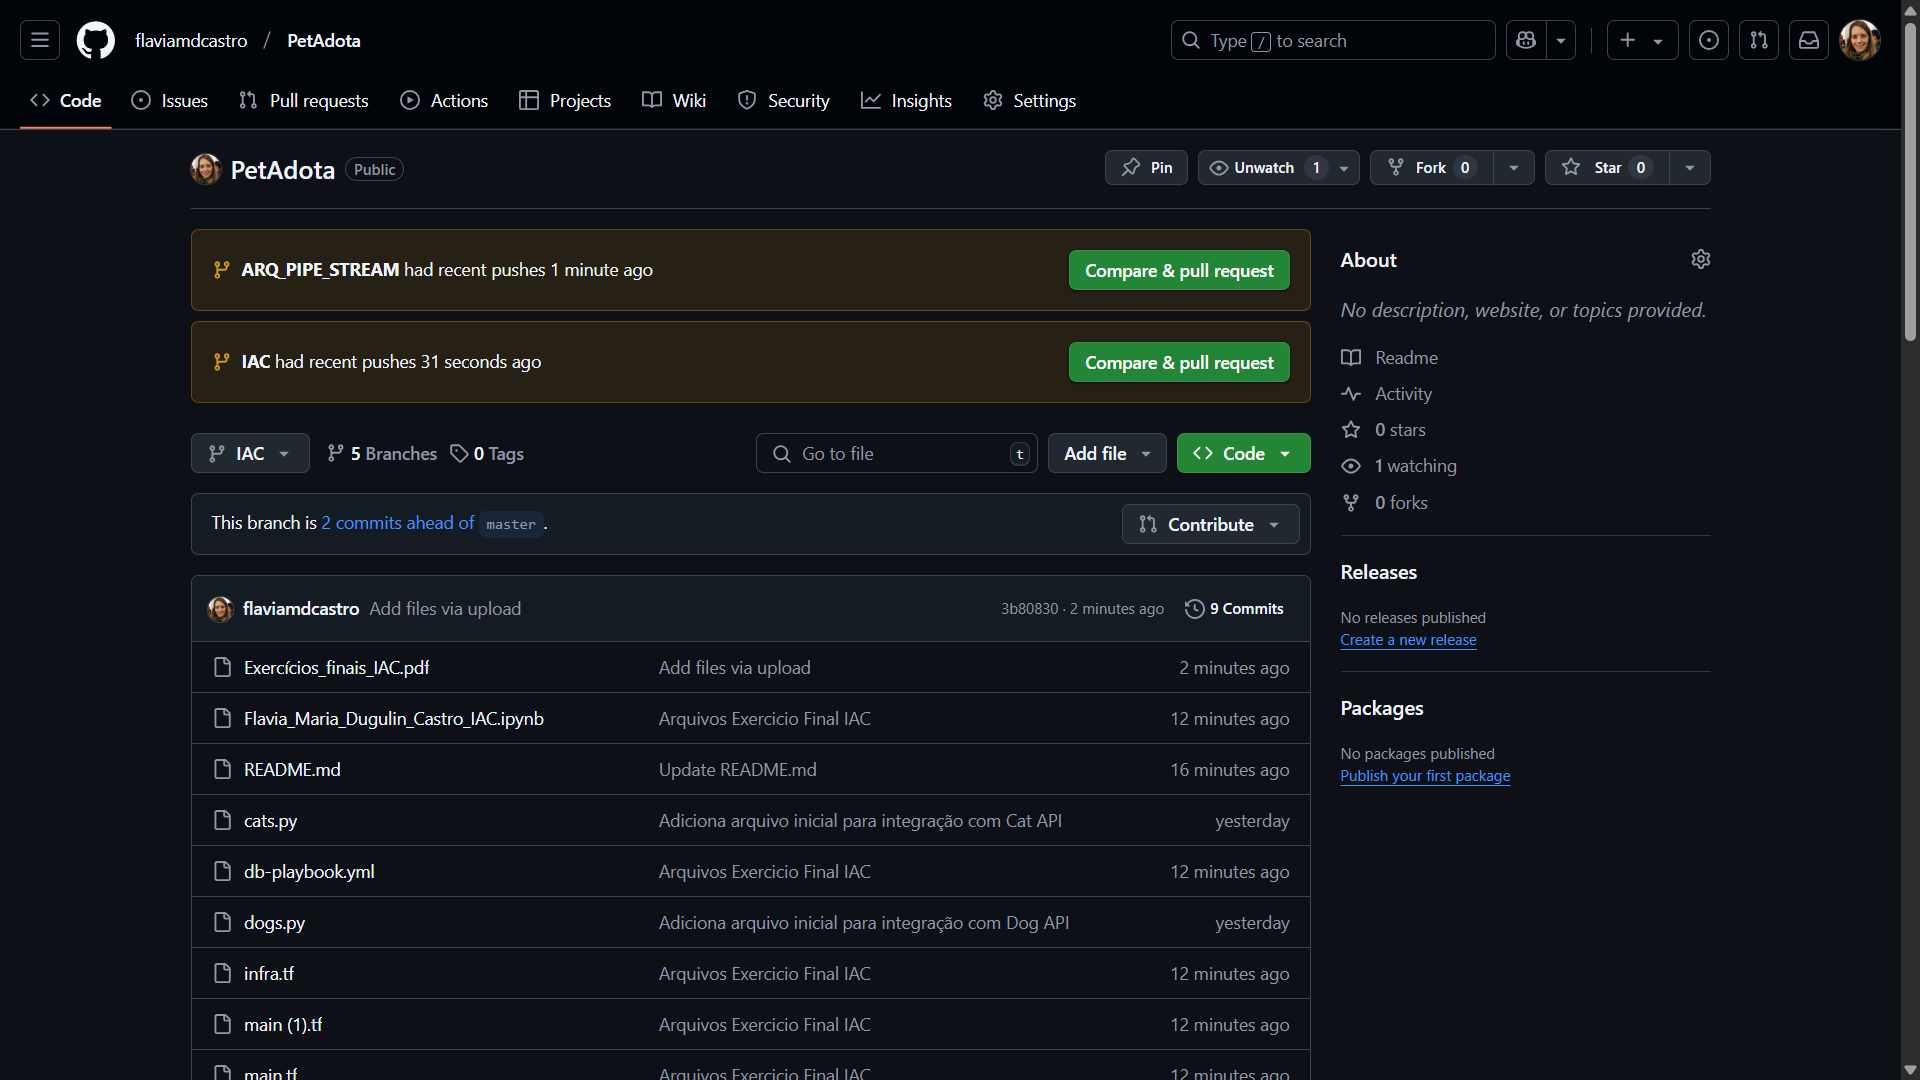